In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
data = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [3]:
X = data.iloc[:, :-1].values
feats_data = data.iloc[:, :-1]
y = data['target'].values

feats_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
target_data = data['target']
target_data

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: target, Length: 150, dtype: float64

In [5]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('TTS Completed')

TTS Completed


In [7]:
# Build a Sequential model
model = Sequential([
    Dense(10, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer with 10 units
    Dense(8, activation='relu'),  # Hidden layer with 8 units
    Dense(3, activation='softmax')  # Output layer with 3 units for each class
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.fit(X_train, y_train, epochs=50, batch_size=5, validation_split=0.1, verbose=1)

Epoch 1/50
 1/22 [>.............................] - ETA: 2s - loss: 1.1402 - accuracy: 0.2000

2024-10-29 15:43:02.165688: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


22/22 [==============================] - 0s 3ms/step - loss: 0.9787 - accuracy: 0.4352 - val_loss: 0.8045 - val_accuracy: 0.8333
Epoch 2/50
22/22 [==============================] - 0s 831us/step - loss: 0.8878 - accuracy: 0.5741 - val_loss: 0.7929 - val_accuracy: 1.0000
Epoch 3/50
22/22 [==============================] - 0s 693us/step - loss: 0.8447 - accuracy: 0.7593 - val_loss: 0.7525 - val_accuracy: 0.6667
Epoch 4/50
22/22 [==============================] - 0s 752us/step - loss: 0.8100 - accuracy: 0.6759 - val_loss: 0.7312 - val_accuracy: 0.5833
Epoch 5/50
22/22 [==============================] - 0s 805us/step - loss: 0.7759 - accuracy: 0.6944 - val_loss: 0.7156 - val_accuracy: 0.5833
Epoch 6/50
22/22 [==============================] - 0s 843us/step - loss: 0.7436 - accuracy: 0.6852 - val_loss: 0.6918 - val_accuracy: 0.5833
Epoch 7/50
22/22 [==============================] - 0s 789us/step - loss: 0.7110 - accuracy: 0.6944 - val_loss: 0.6672 - val_accuracy: 0.5833
Epoch 8/50
22/22 [=

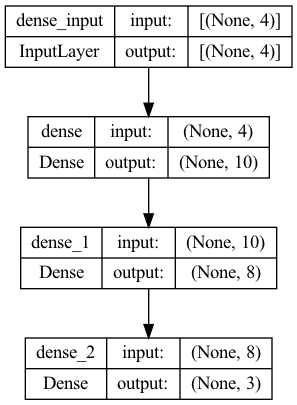

In [9]:
from tensorflow.keras.utils import plot_model

# Save and plot the model architecture
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model_architecture.png')

In [11]:
# Evaluate model accuracy
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

1/1 [==============================] - 0s 14ms/step - loss: 0.2241 - accuracy: 1.0000
Test Accuracy: 1.0


In [12]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

1/1 [==============================] - 0s 64ms/step


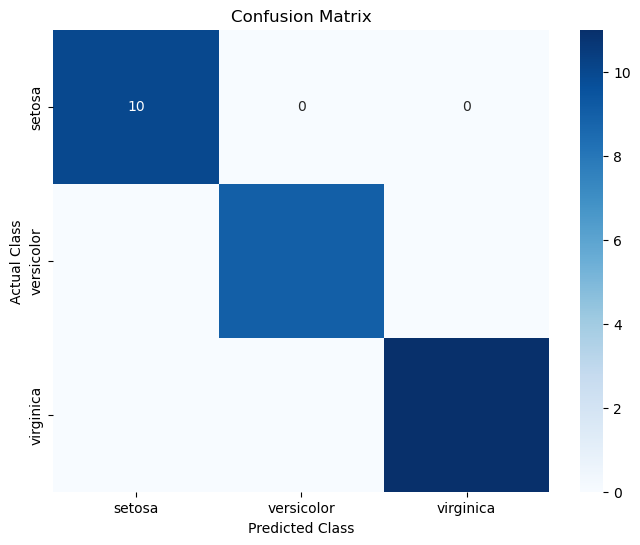

In [13]:
# Confusion matrix to visualize prediction results
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=iris['target_names'], yticklabels=iris['target_names'])
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix")
plt.show()

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [15]:
# Create a simple neural network for demonstration
model = Sequential([
    Dense(10, activation='relu', input_shape=(4,)),  # Input layer
    Dense(8, activation='relu'),  # Hidden layer
    Dense(3, activation='softmax')  # Output layer
])

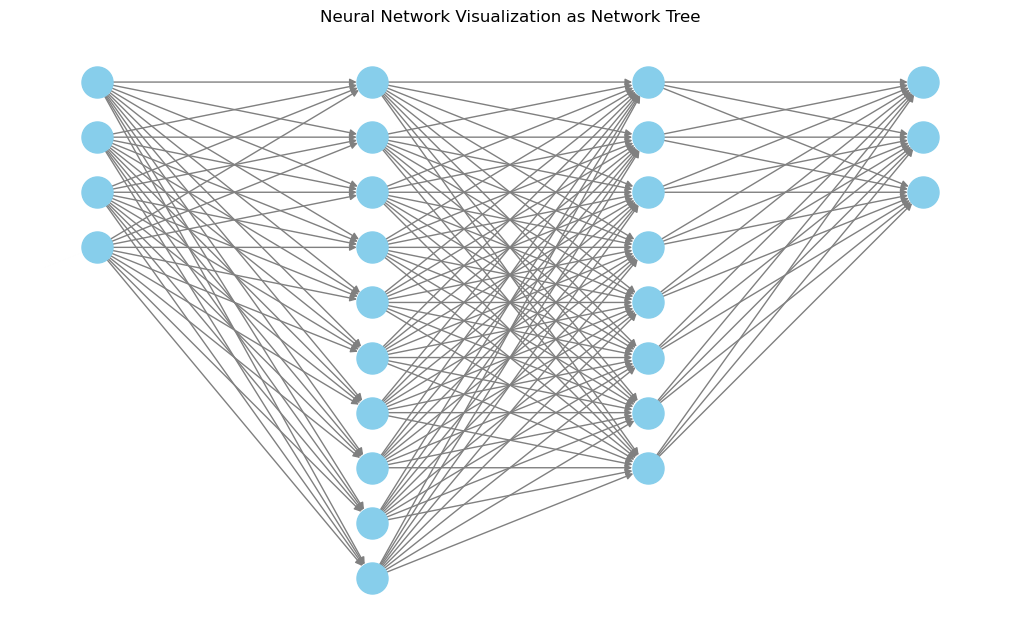

In [16]:
# Visualization function
def visualize_neural_network(model):
    # Create a directed graph
    G = nx.DiGraph()
    
    # Track node labels for graph layout
    layer_sizes = [model.input_shape[1]]  # Start with input size
    layer_sizes.extend([layer.units for layer in model.layers])  # Add units for each layer

    # Add nodes and edges layer-by-layer
    pos = {}  # Position dictionary for nodes
    node_count = 0
    for layer_idx, layer_size in enumerate(layer_sizes):
        # Add nodes for each layer
        for node_idx in range(layer_size):
            G.add_node(node_count, layer=layer_idx)
            pos[node_count] = (layer_idx, -node_idx)  # Positioning in a grid
            node_count += 1
            
    # Add edges between nodes in consecutive layers
    node_count = 0
    for layer_idx in range(len(layer_sizes) - 1):
        layer_size, next_layer_size = layer_sizes[layer_idx], layer_sizes[layer_idx + 1]
        for node_idx in range(layer_size):
            for next_node_idx in range(next_layer_size):
                G.add_edge(node_count + node_idx, node_count + layer_size + next_node_idx)
        node_count += layer_size

    # Draw the graph
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=False, node_size=500, node_color='skyblue', edge_color='gray')
    plt.title("Neural Network Visualization as Network Tree")
    plt.show()

# Call the visualization function
visualize_neural_network(model)